In [1]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


# Load the dataset from CSV
df = pd.read_csv("bald_people.csv", sep=';')

# Preprocess the data
X = []
y = []
for index, row in df.iterrows():
    image = cv2.imread(row['images'])
    image = cv2.resize(image, (224, 224))  # Resize image to desired dimensions
    image = img_to_array(image)
    X.append(image)
    y.append(row['type'])

X = np.array(X)
y = np.array(y)

# Normalize pixel values
X = X / 255.0


# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y = to_categorical(encoded_labels)

# Convert labels to categorical
#y = to_categorical(y)


In [2]:
from tensorflow.keras.applications import VGG16

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))  # num_classes is the number of unique types

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/2
2/2 [==============================] - 8s 2s/step - loss: 1.9887 - accuracy: 0.1515 - val_loss: 10.3425 - val_accuracy: 0.3333
Epoch 2/2
1/1 [==============================] - 1s 1s/step - loss: 6.9228 - accuracy: 0.1111
Test Loss: 6.922825336456299
Test Accuracy: 0.1111111119389534


1/1 [==============================] - 0s 336ms/step
Predicted Class: type_4


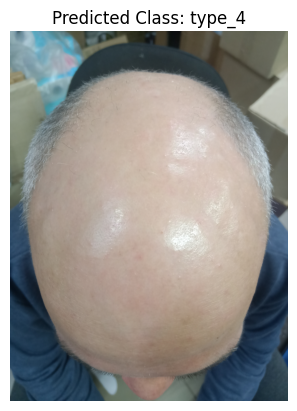

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Load the trained model
#model = load_model("your_model.h5")

# Load and preprocess the new image
new_image_path = "images/eu.04a53e8d-0642-47ce-afed-0dce3d2e3b85.jpg"
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (224, 224))  # Resize image to match training input shape
new_image = img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0

# Make predictions
predictions = model.predict(new_image)
predicted_label = np.argmax(predictions)

# Get the class label from the label encoder
class_label = label_encoder.inverse_transform([predicted_label])

print("Predicted Class:", class_label[0])

if class_label[0]=='type_7':
    print('Last stage of hair loss')


plt.imshow(cv2.cvtColor(cv2.imread(new_image_path), cv2.COLOR_BGR2RGB))
plt.title("Predicted Class: " + class_label[0])
plt.axis('off')
plt.show()


In [10]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk


def main():
    # Create the main Tkinter window
    my_w = tk.Tk()
    my_w.geometry("1200x800")
    my_w.title('Hair Health Prediction')
    my_w.config(bg='blue')

    # Create a title label
    title_label = tk.Label(my_w, text='Hair Health Prediction', font=('Arial', 20, 'bold'), bg='light green')
    title_label.pack(pady=5)

    title_label1 = tk.Label(my_w, text='Welcome ' + entry1.get() + "!", font=('Arial', 10, 'bold'), bg='light blue')
    title_label1.pack(pady=5)
    
    #top.destroy()
    
    # Create a label frame for general pointers
    pointers_frame = tk.LabelFrame(my_w, text="General Pointers", font=('Arial', 12))
    pointers_frame.pack(pady=10, padx=5, fill=tk.X)
    # Create a text widget for general pointers
    pointers_text = '''
    General Pointers:
    - Wash your hair regularly with a mild shampoo.
    - Avoid using excessive heat styling tools.
    - Eat a balanced diet with nutrients for hair health.
    - Avoid harsh chemical treatments and hair dyes.
    - Use a wide-toothed comb for detangling wet hair.
    - Protect your hair from sun and chlorine.
    '''
    pointers_widget = tk.Label(pointers_frame, text=pointers_text, font=('Arial', 9), bg='yellow')
    pointers_widget.pack(pady=1)

    def predict_hair_loss():
        print(filename)
        new_image = cv2.imread(filename)
        new_image = cv2.resize(new_image, (224, 224))  # Resize image to match training input shape
        new_image = img_to_array(new_image)
        new_image = np.expand_dims(new_image, axis=0)
        new_image = new_image / 255.0

        # Make predictions
        predictions = model.predict(new_image)
        predicted_label = np.argmax(predictions)

        # Get the class label from the label encoder
        class_label = label_encoder.inverse_transform([predicted_label])

        print("Predicted Class:", class_label[0])

        if class_label[0]=='type_1':
            text=('''There is a lack of bilateral recessions along the anterior border of the hairline in the frontoparietal regions. No notable hair loss or recession of the hairline.
            Recommendations
            1. Do shampoo daily
            2. Clear your scalp carefully''')
        elif class_label[0]=='type_2':
            text=('There is a small recession of the hairline around the temples. Hair is also lost, or sparse, along the midfrontal border of the scalp, but the depth of the affected area is much less than in the frontoparietal regions. This is commonly referred to as an adult or mature hairline.')
        elif class_label[0]=='type_3':
            text=('The first signs of significant balding appear. There is a deep, symmetrical recession at the temples that are only sparsely covered by hair.')
        elif class_label[0]=='type_4':
            text= ('The hairline recession is harsher than in stage 2, and there is scattered hair or no hair on the vertex. There are deep frontotemporal recessions, usually symmetrical, and are either bare or very sparsely covered by hair.')
        elif class_label[0]=='type_5':
            text= ('The areas of hair loss are more significant than in stage 4. They are still divided, but the band of hair between them is thinner and sparser.')
        elif class_label[0]=='type_6':
            text=('The connection of hair that crosses the crown is gone with only sparse hair remaining. The frontotemporal and vertex regions are joined together, and the extent of hair loss is more significant.')
        elif class_label[0]=='type_7':
            text= ('The most drastic stage of hair loss, only a band of hair, going around the sides of the head persists. This hair usually is not thick and might be dainty.') 
        else:
            text=('Healthy hair')

            # Create a label to display the predicted class
        predicted_label_label = tk.Label(button_frame, text="Predicted Class: " + class_label[0], font=('Arial', 8, 'bold'), bg='light green')
        predicted_label_label.pack(pady=5)

        # Create a label to display the predicted text
        predicted_text_label = tk.Label(button_frame, text=text, font=('Arial', 8), bg='light green', wraplength=400)
        predicted_text_label.pack(pady=5)

        # Create a label to display the predicted text
        #predicted_text_label = tk.Label(button_frame, text=text1, font=('Arial', 8), bg='light green', wraplength=400)
        #predicted_text_label.pack(pady=5)


        plt.imshow(cv2.cvtColor(cv2.imread(new_image_path), cv2.COLOR_BGR2RGB))
        plt.title("Predicted Class: " + class_label[0])
        plt.axis('off')
        plt.show()


    # Create the "Predict Hair Loss" button
    predict_button = tk.Button(my_w, text='Predict Hair Loss', width=20, command=predict_hair_loss)
    predict_button.pack(side=tk.LEFT, padx=20, pady=5)


    # Create a label frame for the uploaded image
    image_frame = tk.LabelFrame(my_w, text="Uploaded Image", font=('Arial', 12))
    image_frame.pack(pady=5, padx=10)
    
    #global img_label
    # Create a label to display the uploaded image
    #img_label = tk.Label(my_w, text='Image uploaded successfully')
    #img_label.pack(pady=10)

    # Create a frame for the buttons
    button_frame = tk.Frame(image_frame)
    button_frame.pack()
    
    def upload_file():
        global img_label
        global filename
        f_types = [('Jpg Files', '*.jpg')]
        filename = filedialog.askopenfilename(filetypes=f_types)
        img = Image.open(filename)
        img = img.resize((200, 200))  # Resize the image to fit the interface
        img = ImageTk.PhotoImage(img)
        img_label = tk.Label(button_frame, text='Image Uploaded Successfully')
        img_label.pack(pady=10)
        #img_label = tk.Label(button_frame, image=img)
        #img_label.pack(pady=10)


    # Create the "Upload Image" button
    upload_button = tk.Button(button_frame, text='Upload Image', width=20, command=upload_file)
    upload_button.pack(side=tk.LEFT, padx=10, pady=5)


    # Create a label frame for the stages of hair loss
    stages_frame = tk.LabelFrame(my_w, text="Stages of Hair Loss", font=('Arial', 12))
    stages_frame.pack(pady=5, padx=20)

    # Create a text widget to display the stages of hair loss
    stages_text = '''
    Type 1: There is a lack of bilateral recessions along the anterior border of the hairline in the frontoparietal regions. No notable hair loss or recession of the hairline.
    Type 2: There is a small recession of the hairline around the temples. Hair is also lost, or sparse, along the midfrontal border of the scalp,
    but the depth of the affected area is much less than in the frontoparietal regions. This is commonly referred to as an adult or mature hairline.
    Type 3: The first signs of significant balding appear. There is a deep, symmetrical recession at the temples that are only sparsely covered by hair.
    Type 4: The hairline recession is harsher than in stage 2, and there is scattered hair or no hair on the vertex. There are deep frontotemporal recessions,
    usually symmetrical, and are either bare or very sparsely covered by hair.
    Type 5: The areas of hair loss are more significant than in stage 4. They are still divided, but the band of hair between them is thinner and sparser.
    Type 6: The connection of hair that crosses the crown is gone with only sparse hair remaining. The frontotemporal and vertex regions are joined together,
    and the extent of hair loss is more significant.
    Type 7: The most drastic stage of hair loss, only a band of hair, going around the sides of the head persists. This hair usually is not thick and might be dainty.
    '''
    stages_widget = tk.Label(stages_frame, text=stages_text, font=('Arial', 9), bg='pink',anchor='center', width=200, wraplength=2000)
    stages_widget.pack(padx=0, pady=3)

    my_w.mainloop()  # Keep the window open


In [ ]:
from tkinter import *
from PIL import Image, ImageTk
    
top = Tk()
top.title("My Application")

# Load the image
original_image = Image.open("welcome.png")

# Resize the image
resized_image = original_image.resize((250, 200))

# Convert the resized image to Tkinter-compatible format
tk_image = ImageTk.PhotoImage(resized_image)

# tkinter GUI
canvas1 = Canvas(top, width=500, height=300)
canvas1.pack()

# Create Name:
label1 = Label(top, text = 'Name: ')
canvas1.create_window(150, 100, window=label1)

global entry1

entry1 = Entry(top) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# Display the resized image on the canvas
canvas1.create_image(140, 100, anchor=NW, image=tk_image)

button1 = Button (top, text = 'Submit',command = main, bg='cyan') 
canvas1.create_window(400, 100, window = button1)

top.mainloop()